In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

PATH = "test-data/dodgechev/"

#arch=resnext50
arch = resnet34
bs=12

 Want to have a look at the size of the images

In [ ]:
def get_data(sz):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    return ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)

In [3]:
data = get_data(224)

In [7]:
fn = PATH + data.trn_ds.fnames[0]; fn

'test-data/dodgechev/train/chev/83. 1967%20chevrolet%20camaro%20z28%20coup%c3%a9%20front%20%c2%be.jpg'

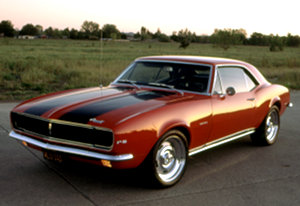

In [8]:
img = PIL.Image.open(fn); img

In [9]:
img.size

(300, 206)

In [11]:
size_d = {k: PIL.Image.open(PATH + k).size for k in data.trn_ds.fnames}

In [12]:
row_sz,col_sz = list(zip(*size_d.values()))
row_sz = np.array(row_sz); col_sz = np.array(col_sz)

In [13]:
row_sz[:5]

array([ 300,  640,  960,  640, 1280])

(array([65., 51., 22.,  7.,  3.,  0.,  0.,  1.,  0.,  1.]),
 array([ 200. ,  781.6, 1363.2, 1944.8, 2526.4, 3108. , 3689.6, 4271.2, 4852.8, 5434.4, 6016. ]),
 <a list of 10 Patch objects>)

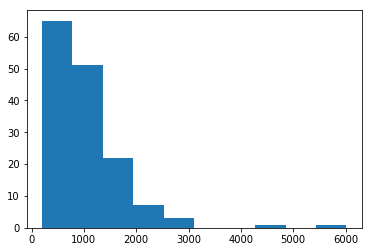

In [14]:
plt.hist(row_sz)

(array([12.,  9., 38., 18., 11., 10., 18.,  7.,  8.,  7.]),
 array([ 200.,  372.,  544.,  716.,  888., 1060., 1232., 1404., 1576., 1748., 1920.]),
 <a list of 10 Patch objects>)

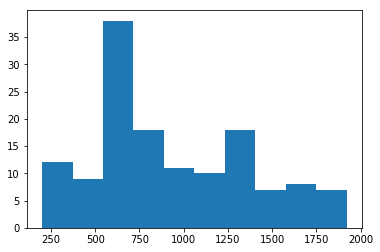

In [15]:
plt.hist(row_sz[row_sz<2000])

(array([75., 46., 18.,  7.,  2.,  0.,  0.,  1.,  0.,  1.]),
 array([ 142. ,  527.8,  913.6, 1299.4, 1685.2, 2071. , 2456.8, 2842.6, 3228.4, 3614.2, 4000. ]),
 <a list of 10 Patch objects>)

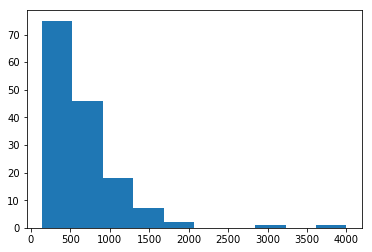

In [16]:
plt.hist(col_sz)

(array([ 7., 10., 11., 42., 11.,  6., 17., 12.,  5.,  6.]),
 array([142. , 226.9, 311.8, 396.7, 481.6, 566.5, 651.4, 736.3, 821.2, 906.1, 991. ]),
 <a list of 10 Patch objects>)

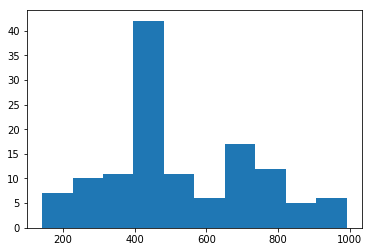

In [17]:
plt.hist(col_sz[col_sz<1000])

So how many images to we have in the training set and the validation set?

In [19]:
len(data.trn_ds)

150

In [2]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

FileNotFoundError: [Errno 2] No such file or directory: '/home/jake/Documents/dev/skunk/fastai/courses/dl1/fastai/weights/resnext_50_32x4d.pth'

In [3]:
learn.fit(1e-2, 4)
learn.precompute=False

epoch      trn_loss   val_loss   accuracy                
    0      0.790625   0.61393    0.638889  
    1      0.661262   0.490538   0.777778        
    2      0.497301   0.391283   0.805556        
    3      0.419752   0.388975   0.777778        



In [4]:
learn.fit(1e-2, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                
    0      0.505097   0.365087   0.805556  
    1      0.35066    0.3526     0.722222                



[array([0.3526]), 0.7222222222222222]

In [5]:
learn.unfreeze()
lr=np.array([1e-4,1e-3,1e-2])

In [8]:
learn.fit(lr, 4, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                 
    0      0.118029   0.510143   0.861111  
    1      0.093462   0.437855   0.833333                 
    2      0.099076   0.422313   0.861111                 
    3      0.082606   0.419423   0.833333                 



[array([0.41942]), 0.8333333200878568]

In [9]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

accuracy(probs,y)

TypeError: torch.max received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (torch.FloatTensor source)
 * (torch.FloatTensor source, torch.FloatTensor other)
      didn't match because some of the keywords were incorrect: dim
 * (torch.FloatTensor source, int dim)
 * (torch.FloatTensor source, int dim, bool keepdim)
